In [38]:
import numpy as np
import random
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Load Dataset

In [39]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [40]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [41]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_train: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_train:  (400, 1)


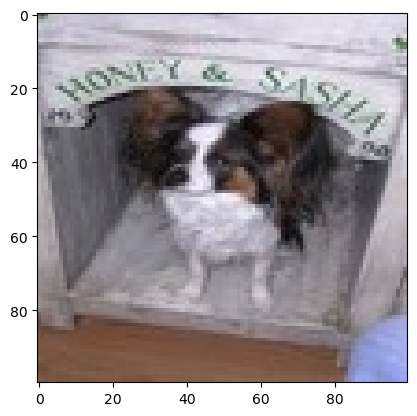

In [42]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model

In [59]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape= (100,100,3)), #32 number of filter, 3x3 height of the filter. first layer
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'), #fully connected layer, 64 neurons
    Dense(1, activation = 'sigmoid') #1 neuron for the ouput
])

In [60]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape= (100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))



In [80]:
# opt = keras.optimizers.SGD(learning_rate = 0.001)
# model.compile(loss= 'binary_crossentropy', optimizer= opt, metrics= ['accuracy']) 
model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy']) 

In [81]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 8s 224ms/step - loss: 0.4507 - accuracy: 0.7890
Epoch 2/5
32/32 [==============================] - 7s 226ms/step - loss: 0.3881 - accuracy: 0.8360
Epoch 3/5
32/32 [==============================] - 7s 227ms/step - loss: 0.3063 - accuracy: 0.8725
Epoch 4/5
32/32 [==============================] - 7s 232ms/step - loss: 0.2681 - accuracy: 0.8985
Epoch 5/5
32/32 [==============================] - 7s 221ms/step - loss: 0.1930 - accuracy: 0.9295


In [50]:
model.evaluate(X_test, Y_test) #increasing the training and testing data would improve the accuracy

13/13 [==============================] - 1s 39ms/step - loss: 1.0503 - accuracy: 0.6975


[1.0502979755401611, 0.6974999904632568]

 # Making prediction

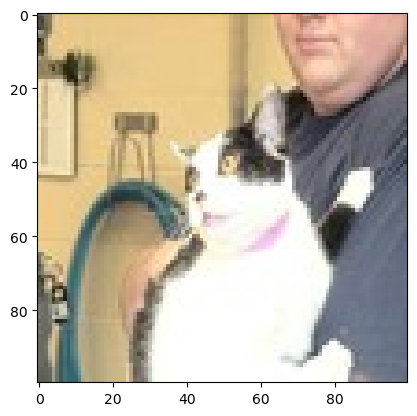

1/1 [==============================] - 0s 24ms/step
Our model says that its a Cat


In [86]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3)) #since the model expect 100,100,3
y_pred = y_pred > 0.5

if y_pred ==0:
    pred = "Dog"
else:
    pred = "Cat"
print("Our model says that its a", pred)